#**<u>Clasificación Estelar</u>**

###Desde siempre hemos mirado al cielo pensando en ¿quiénes somos? ¿por qué estamos aquí? ¿Qué son las estrellas?, en base a estas preguntas y otras más profundas y específicas, nace el estudio de los astros: la astronomía.
###En la Astronomía, la clasificación estelar se basa en características espectrales observables. Algunas de estas características son: filtro ultravioleta, filtro infrarrojo, corrimiento al rojo, etc.
###¿Pero es posible en base a estas características identificar estos objetos?
###Con esta pregunta en nuestras cabezas, elegimos un data frame que es un conjunto de 100.000 observaciones del espacio, obtenidas de la SDSS (Sloan Digital Sky Survey), el cúal es proyecto de investigación del espacio mediante imágenes en el espectro visible y de corrimiento rojo, realizadas en el telescopio Apache Point de Nuevo México.
###Cada observación se describe en 17 columnas de características y 1 columna de clase que identifica a cada observación como estrella, galaxia o cuásar (galaxia recién nacida o bien la energía del agujero negro del centro de la galaxia recien nacida).

##<u>Columnas:</u>
####1- obj_ID = Identificador único de cada objeto
####2- alpha = Ángulo de ascensión derecha
####3- delta = Ángulo de declinación
####4- u = Filtro ultravioleta
####5- g = Filtro verde
####6- r = Filtro rojo
####7- i = Filtro infrarrojo cercano en el sistema fotométrico
####8- z = Filtro infrarrojo en el sistema fotométrico
####9- run_ID = Número de ejecución utilizado para identificar el análisis específico
####10- rereun_ID = Número de repetición para especificar cómo se procesó la imagen
####11- cam_col = Columna de cámara para identificar la línea de exploración dentro de la ejecución
####12- field_ID = Número de campo para identificar cada campo
####13- spec_obj_ID = Identificador único utilizado para objetos espectroscópicos ópticos (esto significa que 2 observaciones diferentes con el mismo spec_obj_ID deben compartir la clase de salida)
####14- class = Clase del objeto (galaxia, estrella o cuásar)
###15- redshift = Valor de corrimiento al rojo basado en el aumento de la longitud de onda
####16- plate = Identificador de placa del SDSS
####17- MJD = Fecha utilizada para indicar cuándo se tomó un determinado dato del SDSS
####18- fiber_ID = Identificador de fibra que apuntó la luz al plano focal en cada observación

In [182]:
# Empecemos!

# Cargamos las librerías con las que vamos a trabajar

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [183]:
# Declaramos la base de datos y la volvemos "df" para poder manipularla

df = pd.read_csv('https://raw.githubusercontent.com/MKSuser/Unsam1/refs/heads/main/TP%20Mate3/star_classification.csv')


In [184]:
# Pinteamos los nombres de las columnas con las que vamos a trabajar

print(df.columns)

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')


In [185]:
# Para poder trabajar con datos mas comprensibles, cambiamos los nombres de las columnas

df.rename(columns={'obj_ID': 'Id del objeto',
                   'alpha': 'Ang Asc Derecha',
                  'delta': 'Ang Declinación',
                   'u': 'Filtro ultravioleta',
                   'g':'Filtro verde',
                   'r': 'Filtro Rojo',
                   'i': 'Filtro Inf. cercano',
                   'z': 'Filtro Inf.',
                   'run_ID': 'Id de Analisis',
                   'rerun_ID': 'Id de repetición',
                   'cam_col': 'Columna de cámara',
                   'field_ID': 'Id de campo',
                   'spec_obj_ID': 'Id',
                   'class': 'Clase',
                   'redshift': 'Corrimiento al Rojo',
                   'plate': 'Id de plada SDSS',
                   'MJD': 'Fecha del dato',
                   'fiber_ID': 'Id de fibra',

                   },inplace=True)

In [186]:
# Podemos observar con mejor detalle el tipo de las variables que ocupan cada columna

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id del objeto        100000 non-null  float64
 1   Ang Asc Derecha      100000 non-null  float64
 2   Ang Declinación      100000 non-null  float64
 3   Filtro ultravioleta  100000 non-null  float64
 4   Filtro verde         100000 non-null  float64
 5   Filtro Rojo          100000 non-null  float64
 6   Filtro Inf. cercano  100000 non-null  float64
 7   Filtro Inf.          100000 non-null  float64
 8   Id de Analisis       100000 non-null  int64  
 9   Id de repetición     100000 non-null  int64  
 10  Columna de cámara    100000 non-null  int64  
 11  Id de campo          100000 non-null  int64  
 12  Id                   100000 non-null  float64
 13  Clase                100000 non-null  object 
 14  Corrimiento al Rojo  100000 non-null  float64
 15  Id de plada SDSS  

In [187]:
# Obtenemos 5 muestras random para poder observar como están compuestas

df.sample(5)


,Id del objeto,Ang Asc Derecha,Ang Declinación,Filtro ultravioleta,Filtro verde,Filtro Rojo,Filtro Inf. cercano,Filtro Inf.,Id de Analisis,Id de repetición,Columna de cámara,Id de campo,Id,Clase,Corrimiento al Rojo,Id de plada SDSS,Fecha del dato,Id de fibra
78253,1.237679e+18,341.564215,3.422134,20.10276,17.59963,16.44123,16.01733,15.73941,7765,301,1,199,4.832421e+18,STAR,0.000064,4292,55532,212
51757,1.237668e+18,155.681566,19.814449,19.13155,17.95544,17.44916,17.24615,17.13923,5183,301,3,166,2.674089e+18,GALAXY,0.039395,2375,53770,278
83003,1.237680e+18,2.460421,28.092674,23.57638,23.67040,21.72262,20.66791,19.69664,8103,301,5,110,8.664070e+18,GALAXY,0.804548,7695,57654,981
53187,1.237651e+18,124.221465,51.073649,22.48450,22.15456,20.66866,19.87745,19.22171,1402,301,5,138,4.153508e+18,GALAXY,0.451523,3689,55180,228
96505,1.237653e+18,0.029838,-9.727753,19.41039,19.55152,19.98869,20.26811,21.11751,1740,301,4,22,7.319716e+17,STAR,-0.000328,650,52143,497


In [188]:
# Sabiendo que lo que buscamos es poder determinar es lo que se encuentra en la colmuna "class",
#  obtenemos qué clases (output) hay y cuántos resultados hay de cada una.

df["Clase"].value_counts()


,count
Clase,
GALAXY,59445
STAR,21594
QSO,18961


In [189]:
# Por si llegan a haber muestras sin datos, los limpiamos. Si no hay NaN no va a pasar nada.

df = df.dropna()

df["Clase"].value_counts()


,count
Clase,
GALAXY,59445
STAR,21594
QSO,18961


In [190]:
# Observamos que contamos con la misma cantiadad de resultados, por lo que no habría ningún NaN.

In [191]:
# Entre los datos de la base, nos encontramos con que el output se determina con las palabras "GALAXY" (galaxia), "STAR" (estrella) y "QSO" (Objeto cuasi estelar).
# Para poder buscar correlatividades, convertimos estas palabras en los valores 0, 1 y 2.
# Generamos un diccinario para poder reemp los datos

class_rep = {
     "GALAXY": 0,
     "STAR":   1,
     "QSO":    2,
}

In [192]:
# Generamos un nuevo df para poder hacer pruebas

df_limpio = df

# Reemplazamos los datos del diccionario "class_rep" por los que figuran en la colmuna "class"

df_limpio['Clase'] = df_limpio['Clase'].replace(class_rep)

# Movemos la columna 'Clase' al final previendo que la vamos a necesitar en la red neuronal
df_limpio = df_limpio[[col for col in df.columns if col != 'Clase'] + ['Clase']]


<ipython-input-192-c30fd122cb84>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_limpio['Clase'] = df_limpio['Clase'].replace(class_rep)


In [193]:
# Verifiamos que en la nueva base tenemos valores numericos en la columna "class" en lugar de texto

df_limpio.sample(5)

,Id del objeto,Ang Asc Derecha,Ang Declinación,Filtro ultravioleta,Filtro verde,Filtro Rojo,Filtro Inf. cercano,Filtro Inf.,Id de Analisis,Id de repetición,Columna de cámara,Id de campo,Id,Corrimiento al Rojo,Id de plada SDSS,Fecha del dato,Id de fibra,Clase
67719,1.237668e+18,175.196360,19.010256,25.55071,21.62406,20.00481,19.14406,18.67573,5313,301,2,105,6.620481e+18,0.519126,5880,56042,691,0
90144,1.237679e+18,26.999574,24.451987,22.14134,19.99592,18.30923,17.71045,17.25489,7709,301,6,35,6.413194e+18,0.282603,5696,55946,249,0
27612,1.237651e+18,148.842085,59.516674,21.27206,21.27919,20.88724,21.00510,20.68435,1331,301,3,271,9.225877e+18,1.385686,8194,57401,919,2
12056,1.237658e+18,181.918724,51.058131,25.38703,24.38722,22.27254,20.89531,19.74339,2964,301,6,309,9.260565e+18,0.904953,8225,57375,137,0
70863,1.237658e+18,117.252147,27.004487,23.95841,21.03135,20.33952,20.08745,19.96269,2830,301,5,49,5.020543e+18,0.000133,4459,55533,564,1


array([[<Axes: title={'center': 'Id del objeto'}>,
        <Axes: title={'center': 'Ang Asc Derecha'}>,
        <Axes: title={'center': 'Ang Declinación'}>,
        <Axes: title={'center': 'Filtro ultravioleta'}>],
       [<Axes: title={'center': 'Filtro verde'}>,
        <Axes: title={'center': 'Filtro Rojo'}>,
        <Axes: title={'center': 'Filtro Inf. cercano'}>,
        <Axes: title={'center': 'Filtro Inf.'}>],
       [<Axes: title={'center': 'Id de Analisis'}>,
        <Axes: title={'center': 'Id de repetición'}>,
        <Axes: title={'center': 'Columna de cámara'}>,
        <Axes: title={'center': 'Id de campo'}>],
       [<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Corrimiento al Rojo'}>,
        <Axes: title={'center': 'Id de plada SDSS'}>,
        <Axes: title={'center': 'Fecha del dato'}>],
       [<Axes: title={'center': 'Id de fibra'}>,
        <Axes: title={'center': 'Clase'}>, <Axes: >, <Axes: >]],
      dtype=object)

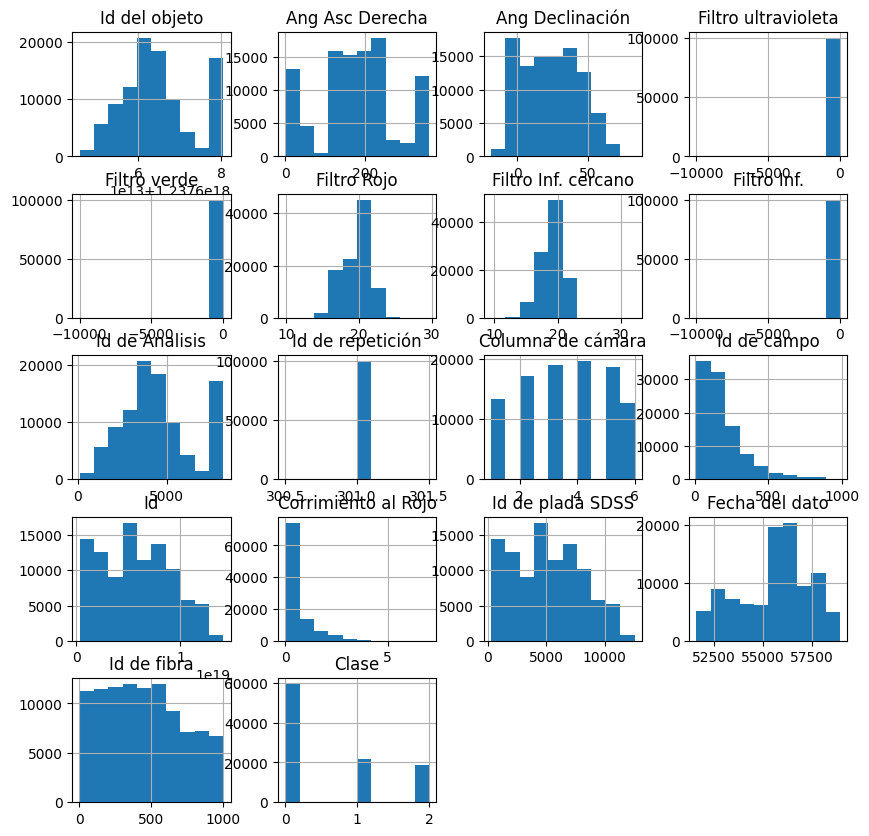

In [194]:
# Imprimimos los histogramas de cada columna para poder evaluar distribución de datos.

df_limpio.hist(figsize=(10, 10))

num_atipicos:
 Id del objeto             0
Ang Asc Derecha           0
Ang Declinación           0
Filtro ultravioleta      56
Filtro verde             99
Filtro Rojo             132
Filtro Inf. cercano     198
Filtro Inf.             320
Id de Analisis            0
Id de repetición          0
Columna de cámara         0
Id de campo            5391
Id                        0
Corrimiento al Rojo    8990
Id de plada SDSS          0
Fecha del dato            0
Id de fibra               0
Clase                     0
dtype: int64


array([[<Axes: title={'center': 'Id del objeto'}>,
        <Axes: title={'center': 'Ang Asc Derecha'}>,
        <Axes: title={'center': 'Ang Declinación'}>,
        <Axes: title={'center': 'Filtro ultravioleta'}>],
       [<Axes: title={'center': 'Filtro verde'}>,
        <Axes: title={'center': 'Filtro Rojo'}>,
        <Axes: title={'center': 'Filtro Inf. cercano'}>,
        <Axes: title={'center': 'Filtro Inf.'}>],
       [<Axes: title={'center': 'Id de Analisis'}>,
        <Axes: title={'center': 'Id de repetición'}>,
        <Axes: title={'center': 'Columna de cámara'}>,
        <Axes: title={'center': 'Id de campo'}>],
       [<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Corrimiento al Rojo'}>,
        <Axes: title={'center': 'Id de plada SDSS'}>,
        <Axes: title={'center': 'Fecha del dato'}>],
       [<Axes: title={'center': 'Id de fibra'}>,
        <Axes: title={'center': 'Clase'}>, <Axes: >, <Axes: >]],
      dtype=object)

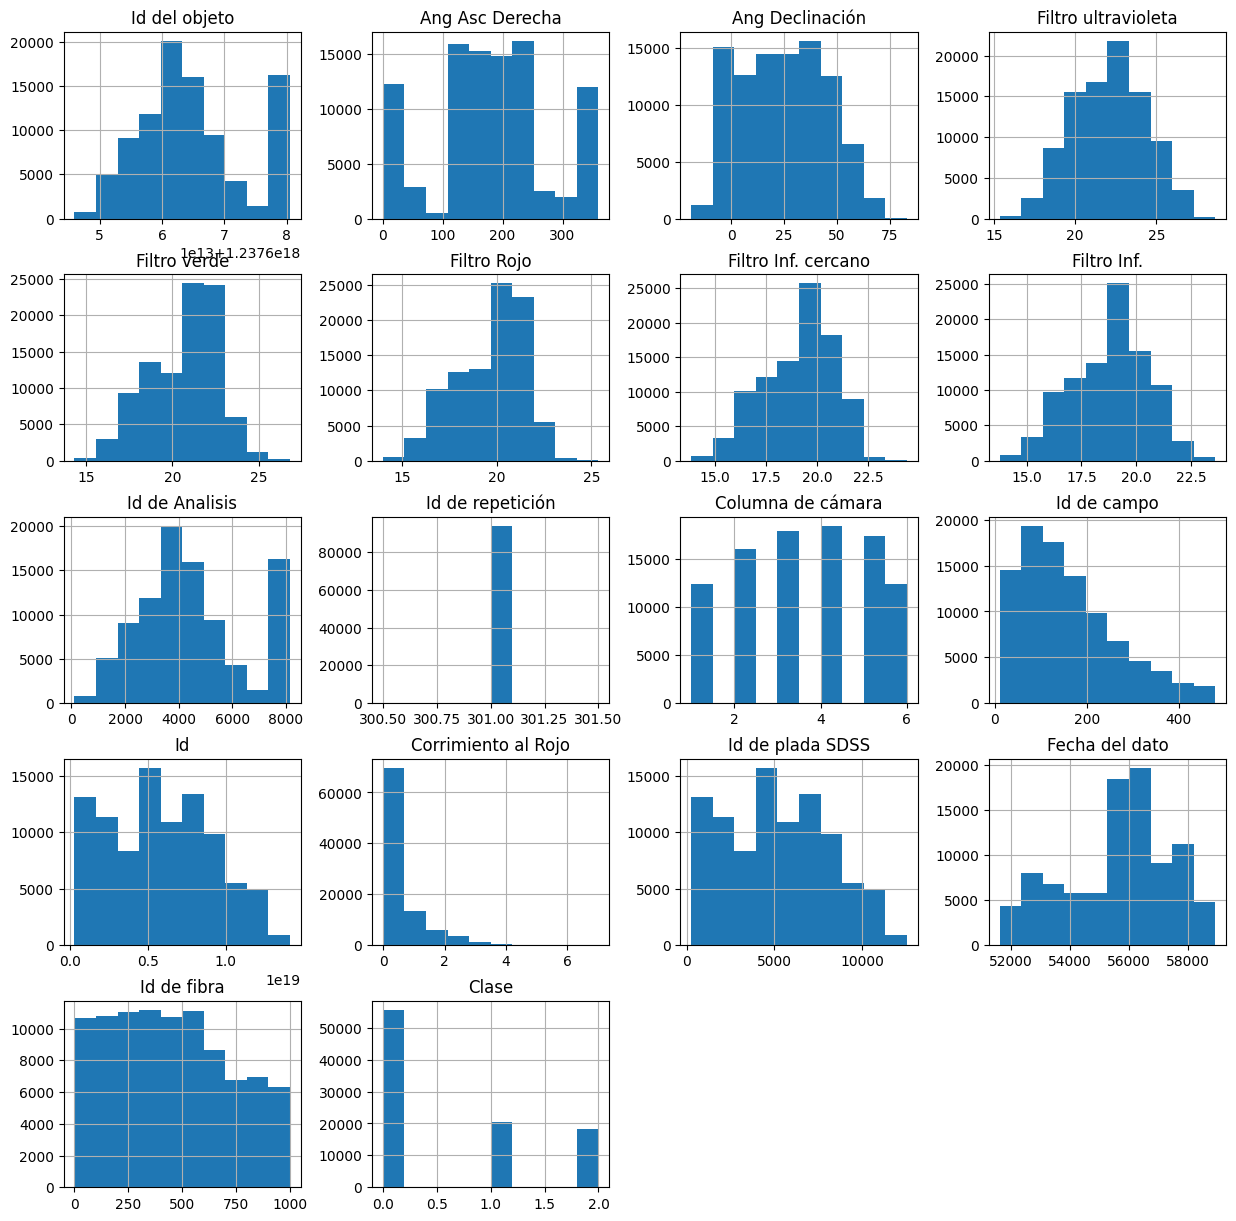

In [195]:
# Como observamos datos variados optamos por trabajarlo por cuartiles, de esta manera alejamos valores atípicos

df_limpio_salida = df_limpio['Clase']
df_limpio_red = df_limpio['Corrimiento al Rojo']

# Primero separamos los cuartiles teniendo encuenta antes del 25%, y luego del 75%
Q1 = df_limpio.quantile(0.25)
Q3 = df_limpio.quantile(0.75)

# Tomamos la diferencia para poder laburar
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
atipicos = ((df_limpio < (Q1 - 1.5 * IQR)) | (df_limpio > (Q3 + 1.5 * IQR)))

# Con esto se pueden saber los valores
num_atipicos = atipicos.sum()
print("num_atipicos:\n", num_atipicos)

# Saco del df_limpio las filas con valores atípicos
df_limpio = df_limpio.where(np.invert(atipicos))

# Insertamos la columna de salida original
df_limpio['Clase'] = df_limpio_salida
df_limpio['Corrimiento al Rojo'] = df_limpio_red

df_limpio = df_limpio.dropna()

# Nuevos histogramas
df_limpio.hist(figsize=(15, 15))

In [196]:
# Emitimos una estadística rápida de los datos pero con datos normalizados

df_limpio_salida = df_limpio['Clase']

df_limpio_stats = df_limpio.describe().T
df_limpio_n = (df_limpio - df_limpio_stats['mean']) / df_limpio_stats['std']  # Para normalizar: (valor - promedio) / desv_estandar

df_limpio_n['Clase'] = df_limpio_salida

df_limpio_n.describe()


,Id del objeto,Ang Asc Derecha,Ang Declinación,Filtro ultravioleta,Filtro verde,Filtro Rojo,Filtro Inf. cercano,Filtro Inf.,Id de Analisis,Id de repetición,Columna de cámara,Id de campo,Id,Corrimiento al Rojo,Id de plada SDSS,Fecha del dato,Id de fibra,Clase
count,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,0.0,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,94230.000000
mean,1.537829e-11,2.967947e-16,3.559123e-17,-1.421953e-15,-9.240147e-16,1.056426e-16,-1.542563e-15,1.503579e-15,8.445377e-18,NaN,-9.772508e-17,-1.375390e-16,2.997355e-16,2.412965e-18,6.756302e-17,-5.741348e-16,-1.568427e-17,0.602706
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.790908
min,-2.220194e+00,-1.874779e+00,-2.225193e+00,-3.017696e+00,-3.146584e+00,-3.104853e+00,-3.030083e+00,-2.885179e+00,-2.220215e+00,NaN,-1.587325e+00,-1.431396e+00,-1.684375e+00,-8.078466e-01,-1.684356e+00,-2.252299e+00,-1.641947e+00,0.000000
25%,-6.585988e-01,-5.243745e-01,-9.182433e-01,-7.743911e-01,-8.246431e-01,-8.198730e-01,-7.754395e-01,-7.462537e-01,-6.586893e-01,NaN,-9.581692e-01,-7.823020e-01,-8.926849e-01,-7.167002e-01,-8.926750e-01,-6.781511e-01,-8.412472e-01,0.000000
50%,-1.614992e-01,5.843449e-03,-7.742845e-04,4.135116e-02,2.315774e-01,2.629905e-01,1.845515e-01,1.340043e-01,-1.614010e-01,NaN,3.001427e-01,-2.095718e-01,-5.672465e-02,-2.027057e-01,-5.674718e-02,1.611709e-01,-6.248453e-02,0.000000
75%,4.508342e-01,5.807933e-01,8.074450e-01,7.147557e-01,7.329122e-01,7.565672e-01,7.554135e-01,6.567189e-01,4.508026e-01,NaN,9.292986e-01,5.540685e-01,7.485283e-01,1.757785e-01,7.485481e-01,6.551527e-01,7.272466e-01,1.000000
max,1.874697e+00,1.867804e+00,2.959903e+00,2.918567e+00,3.059649e+00,3.117907e+00,3.047688e+00,2.763571e+00,1.874532e+00,NaN,1.558455e+00,3.035899e+00,2.495655e+00,8.747721e+00,2.495623e+00,1.840374e+00,2.010560e+00,2.000000


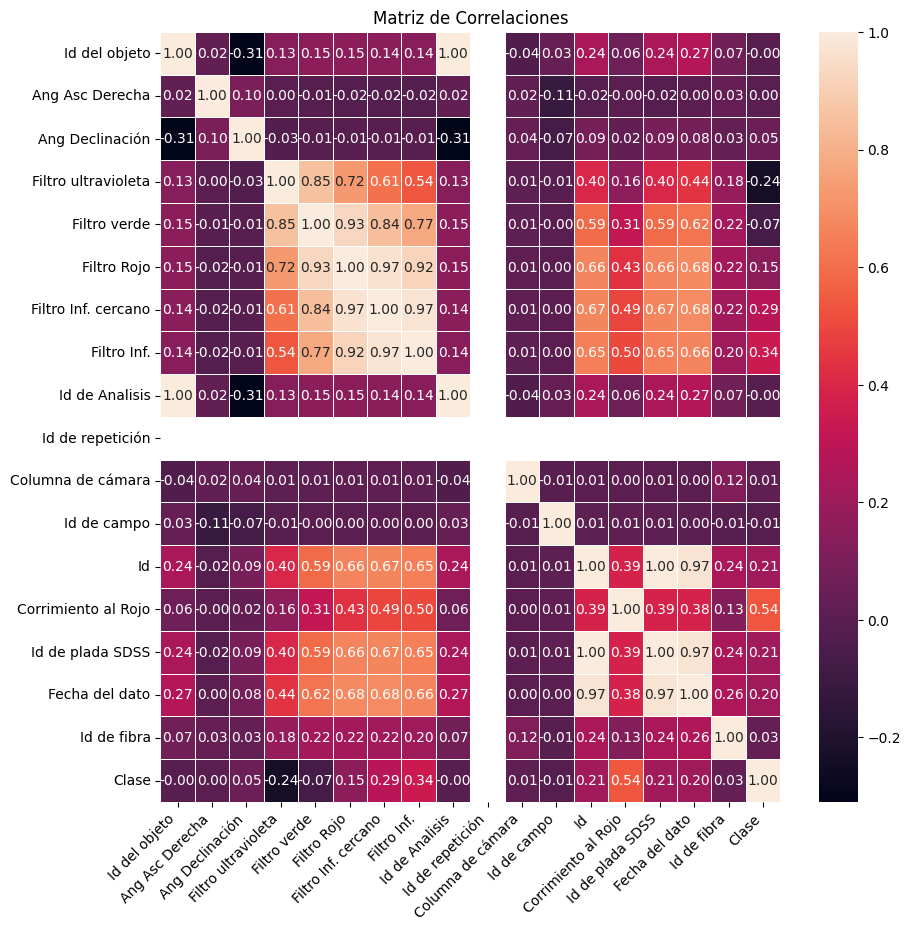

In [197]:
# df.to_csv('prueba.csv')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_limpio.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
ax.set_xticklabels(df_limpio.columns.to_list(), rotation=45, ha='right')
plt.title("Matriz de Correlaciones")
plt.show()


In [198]:
# Concluimos que hay una correlacion interesante con las siguientes colmunas:
# u,

# Para que se pueda trabajar con valores correlativos optamos por trabajar con la base como llega.
# Por lo que vemos los valores dan más acorde.

In [199]:
# Limpiamos las colmunas con poca correlacion

df_limpio = df_limpio.drop ('Id del objeto', axis = 1)
df_limpio = df_limpio.drop ('Ang Asc Derecha', axis = 1)
df_limpio = df_limpio.drop ('Ang Declinación', axis = 1)
# df_limpio = df_limpio.drop ('Filtro ultravioleta', axis = 1)
df_limpio = df_limpio.drop ('Filtro verde', axis = 1)
# df_limpio = df_limpio.drop ('Filtro Rojo', axis = 1)
# df_limpio = df_limpio.drop ('Filtro Inf. cercano', axis = 1)
# df_limpio = df_limpio.drop ('Filtro Inf.', axis = 1)
df_limpio = df_limpio.drop ('Id de Analisis', axis = 1)
df_limpio = df_limpio.drop ('Id de repetición', axis = 1)
df_limpio = df_limpio.drop ('Columna de cámara', axis = 1)
df_limpio = df_limpio.drop ('Id de campo', axis = 1)
df_limpio = df_limpio.drop ('Id', axis = 1)
df_limpio = df_limpio.drop ('Id de plada SDSS', axis = 1)
df_limpio = df_limpio.drop ('Fecha del dato', axis = 1)
df_limpio = df_limpio.drop ('Id de fibra', axis = 1)


# df_limpio = df_limpio.drop ('obj_ID', axis = 1)
# df_limpio = df_limpio.drop ('alpha', axis = 1)
# df_limpio = df_limpio.drop ('delta', axis = 1)
# # df_limpio = df_limpio.drop ('u', axis = 1)
# df_limpio = df_limpio.drop ('g', axis = 1)
# # df_limpio = df_limpio.drop ('r', axis = 1)
# # df_limpio = df_limpio.drop ('i', axis = 1)
# # df_limpio = df_limpio.drop ('z', axis = 1)
# df_limpio = df_limpio.drop ('run_ID', axis = 1)
# # df_limpio = df_limpio.drop ('rerun_ID', axis = 1)
# df_limpio = df_limpio.drop ('cam_col', axis = 1)
# df_limpio = df_limpio.drop ('field_ID', axis = 1)
# df_limpio = df_limpio.drop ('spec_obj_ID', axis = 1)
# df_limpio = df_limpio.drop ('plate', axis = 1)
# df_limpio = df_limpio.drop ('MJD', axis = 1)
# df_limpio = df_limpio.drop ('fiber_ID', axis = 1)



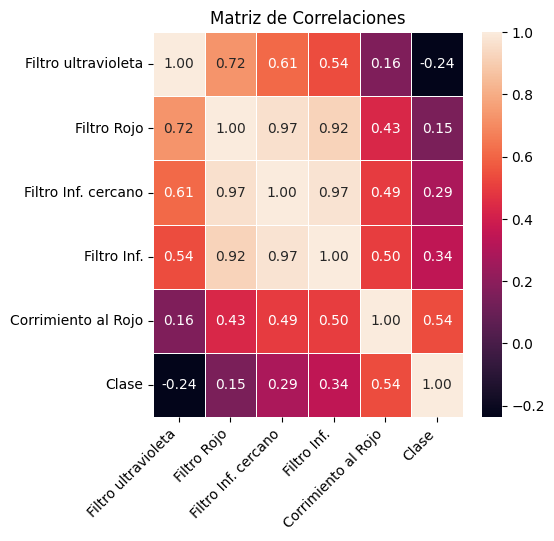

In [200]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_limpio.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
ax.set_xticklabels(df_limpio.columns.to_list(), rotation=45, ha='right')
plt.title("Matriz de Correlaciones")
plt.show()

# from google.colab import files
# df_limpio.to_csv('df_limpio.csv', index=False)  # Add this line to save the DataFrame
# files.download("df_limpio.csv")


In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Extraer variables de entrada (todas las filas, todas las columnas menos de "class")
X = (df_limpio.values[:, :-1])

# Extraer columna de salida (todas las filas, columna "class")
Y = df_limpio.values[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

#red
nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=50_000,
                   learning_rate_init=.005)

#entrenamiento
nn.fit(X_train, Y_train)

print("Porcentaje de aciertos con train: ", (nn.score(X_train, Y_train)*100))
print("Porcentaje de aciertos con test: ", (nn.score(X_test, Y_test)*100))

Porcentaje de aciertos con train:  96.38968481375359
Porcentaje de aciertos con test:  96.48201209805795


In [202]:
# Con estocastico

# Llamado de las librerias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Declaramos el dataFrame como all_data
all_data = df_limpio

# Separamos los datos a tener en cuenta, por un lado los datos de entrada, por el otro los de salida ("class")
all_inputs = all_data.iloc[:, 0:5].values # Entradas: columnas 0 a 7
all_outputs = all_data.iloc[:, -1].values # Salidas: última columna

# Declaramos la funcion a utilizar para normalizar los datos
def normalizador(X):
    # Calculamos la media y la desviación estándar
    promedio = np.mean(X, axis=0)  # Promedio de cada columna
    desvEst = np.std(X, axis=0)    # Desviación estándar de c/c

    datoNormalizado = (X - promedio) / desvEst
    return datoNormalizado

all_inputs = normalizador(all_inputs)

### Convertir las salidas a formato one-hot

# Declaramos la cantidad de respuestas posibles
# Tener en cuenta que las salidas son 3
respPosibles = 3

# Con nume.eye(respPosibles) generamos una matriz identidad 3x3 que va a reemplazar a los valores (0,1,2) originales
# Al combinarla con all_outputs vinculamos cada fila de la MId con cada valor
# La primer fila sería 0, la segunda 1, y la tercera 2
# Hacemos esto para poder trabajar las 3 posibilidades dentro de la red.
y_matriz = np.eye(respPosibles)[all_outputs]

# Dividir en un conjunto de entrenamiento y uno de prueba
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, y_matriz, test_size=1/3)

n = X_train.shape[0]  # número de registros de entrenamiento

print(n)

### Funciones de activación

# Función ReLu
relu = lambda x: np.maximum(x, 0)

# Función softmax ------- Agregar como funciona ---------
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

### Construimos la red neuronal con pesos y sesgos iniciados aleatoriamente

# Primero determinamos un seed para controlar los valores random

np.random.seed(5429)

w_hidden = (np.random.rand(3, 5) * 2) - 1 # Pesos de la capa oculta (3 neuronas, 8 entradas)
w_output = (np.random.rand(3, 3) * 2) - 1 # Pesos de la capa de salida (3 clases, 3 neuronas ocultas)

b_hidden = (np.random.rand(3, 1) * 2) - 1 # Biases de la capa oculta (3 neuronas)
b_output = (np.random.rand(3, 1) * 2) - 1 # Biases de la capa de salida (3 clases)

# Función del forward para recorrer la red de atrás para adelante
def forward_prop(X):
    Z1 = w_hidden @ X.T + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Función para deteminar el accuracy ----- Ver como funciona argmax()
def accuracy(X, Y):
    test_predictions = forward_prop(X)[3]  # De acá le damos bola al valor que sale de A2
    predicted_classes = np.argmax(test_predictions, axis=0)  # Obtener clase con mayor probabilidad
    true_classes = np.argmax(Y, axis=1)  # Etiquetas verdaderas
    accuracy = np.mean(predicted_classes == true_classes)  # Porcentaje de aciertos
    print("Aciertos: ", (accuracy * 100).round(1))

# Printeamos el accuracy que generamos con el forward
print('Pre entrenamiento: \n')
print('Test')
accuracy(X_test, Y_test)
print('Train')
accuracy(X_train, Y_train)

### Devuelve pendientes para pesos y sesgos usando la regla de la cadena
# Derivada de ReLU
def d_relu(Z):
    return (Z > 0).astype(float)

# Derivada de softmax
def d_softmax(muestra):
    s = muestra.reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)

          #((3,1),(3,1),(3,1),(3,1),(1,8),(3,1))
def backward_prop(Z1, A1, Z2, A2, X, Y):
    m = X.shape[0]  # número de ejemplos

    dC_dA2 = A2 - Y.T  # (3, 1)
    dA2_dZ2 = d_softmax(A2)  # (3, 3)
    dZ2_dA1 = w_output.T  # (3, 3)
    dZ2_dW2 = A1.T
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)  # (3, 1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

#            ((3, 1) @ (1, m))  / m = (3, m)
    dC_dW2 = (dC_dA2 @ dZ2_dW2) / m

#                       ((3, 1) * 1 ) / m
    dC_dB2 = np.sum(dC_dA2, axis=1, keepdims=True) * dZ2_dB2 / m

#             (3,3)  @  [(3, 3) @ (3, 1) = (3,1)] = (3, 1)
    dC_dA1 = dZ2_dA1 @ np.dot(dA2_dZ2, dC_dA2)

#             (3, 1) * (3, 1) @ (1, 8) = (3,8)
    dC_dW1 = (dC_dA1 * dA1_dZ1 @ dZ1_dW1) / m

#                    (3, 1) * (3, 1) * 1 = (3, 1)
    dC_dB1 = np.sum((dC_dA1 * dA1_dZ1 * dZ1_dB1), axis=1, keepdims=True) / m

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# La tasa de aprendizaje
L = 0.005

# Ejecutar descenso de gradiente estocástico
num_epochs = 50_000  # Aumentar el número de épocas

for i in range(num_epochs):
    idx = np.random.randint(0, n)  # Elegir un solo índice aleatorio

    X_sample = X_train[idx:idx+1]  # Obtener el ejemplo
    Y_sample = Y_train[idx:idx+1]  # Obtener la etiqueta correspondiente

    Z1, A1, Z2, A2 = forward_prop(X_sample)

    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # Actualizamos los pesos y biases
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

# Cálculo de precisión
print('Post entrenamiento: \n')
print('Test')
accuracy(X_test, Y_test)
print('Train')
accuracy(X_train, Y_train)

62820
Pre entrenamiento: 

Test
Aciertos:  48.2
Train
Aciertos:  48.8
Post entrenamiento: 

Test
Aciertos:  93.0
Train
Aciertos:  93.1


In [203]:
# Con estocastico / Pruebas para printeo de gráficos

# Llamado de las librerias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

# Declaramos el dataFrame como all_data
all_data = df_limpio

# Separamos los datos a tener en cuenta, por un lado los datos de entrada, por el otro los de salida ("class")
all_inputs = all_data.iloc[:, 0:5].values # Entradas: columnas 0 a 7
all_outputs = all_data.iloc[:, -1].values # Salidas: última columna

# Declaramos la funcion a utilizar para normalizar los datos
def normalizador(X):
    # Calculamos la media y la desviación estándar
    promedio = np.mean(X, axis=0)  # Promedio de cada columna
    desvEst = np.std(X, axis=0)    # Desviación estándar de c/c

    datoNormalizado = (X - promedio) / desvEst
    return datoNormalizado

all_inputs = normalizador(all_inputs)

### Convertir las salidas a formato one-hot

# Declaramos la cantidad de respuestas posibles
# Tener en cuenta que las salidas son 3
respPosibles = 3

# Con nume.eye(respPosibles) generamos una matriz identidad 3x3 que va a reemplazar a los valores (0,1,2) originales
# Al combinarla con all_outputs vinculamos cada fila de la MId con cada valor
# La primer fila sería 0, la segunda 1, y la tercera 2
# Hacemos esto para poder trabajar las 3 posibilidades dentro de la red.
y_matriz = np.eye(respPosibles)[all_outputs]

# Dividir en un conjunto de entrenamiento y uno de prueba
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, y_matriz, test_size=1/3)

n = X_train.shape[0]  # número de registros de entrenamiento

print(n)

### Funciones de activación

# Función ReLu
relu = lambda x: np.maximum(x, 0)

# Función softmax ------- Agregar como funciona ---------
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

def red(L, iters):

    ### Construimos la red neuronal con pesos y sesgos iniciados aleatoriamente

    # Primero determinamos un seed para controlar los valores random

    np.random.seed(55429)

    w_hidden = (np.random.rand(3, 5) * 2) - 1 # Pesos de la capa oculta (3 neuronas, 8 entradas)
    w_output = (np.random.rand(3, 3) * 2) - 1 # Pesos de la capa de salida (3 clases, 3 neuronas ocultas)

    b_hidden = (np.random.rand(3, 1) * 2) - 1 # Biases de la capa oculta (3 neuronas)
    b_output = (np.random.rand(3, 1) * 2) - 1 # Biases de la capa de salida (3 clases)

    # Función del forward para recorrer la red de atrás para adelante
    def forward_prop(X):
        Z1 = w_hidden @ X.T + b_hidden
        A1 = relu(Z1)
        Z2 = w_output @ A1 + b_output
        A2 = softmax(Z2)
        return Z1, A1, Z2, A2

    conteoTest = []
    conteoTrain = []

    # Cálculo de precisión
    def accuracyTest(X, Y):
        test_predictions = forward_prop(X)[3]  # solo nos interesa A2
        predicted_classes = np.argmax(test_predictions, axis=0)  # obtener clase con mayor probabilidad
        true_classes = np.argmax(Y, axis=1)  # etiquetas verdaderas
        accuracy = np.mean(predicted_classes == true_classes)  # porcentaje de aciertos
        # print("Porcentaje de aciertos: ", (accuracy * 100).round(2))
        conteoTest.append(accuracy)

    def accuracyTrain(X, Y):
        test_predictions = forward_prop(X)[3]  # solo nos interesa A2
        predicted_classes = np.argmax(test_predictions, axis=0)  # obtener clase con mayor probabilidad
        true_classes = np.argmax(Y, axis=1)  # etiquetas verdaderas
        accuracy = np.mean(predicted_classes == true_classes)  # porcentaje de aciertos
        # print("Porcentaje de aciertos: ", (accuracy * 100).round(2))
        conteoTrain.append(accuracy)

        # # Printeamos el accuracy que generamos con el forward
        # print('Pre entrenamiento: \n')
        # print('Test')
        # accuracy(X_test, Y_test)
        # print('Train')
        # accuracy(X_train, Y_train)

    # Devuelve pendientes para pesos y sesgos usando la regla de la cadena
    # Derivada de ReLU
    def d_relu(Z):
        return (Z > 0).astype(float)

    # Derivada de softmax
    def d_softmax(muestra):
        s = muestra.reshape(-1, 1)
        return np.diagflat(s) - np.dot(s, s.T)

              #((3,1),(3,1),(3,1),(3,1),(1,8),(3,1))
    def backward_prop(Z1, A1, Z2, A2, X, Y):
        m = X.shape[0]  # número de ejemplos

        dC_dA2 = A2 - Y.T  # (3, 1)
        dA2_dZ2 = d_softmax(A2)  # (3, 3)
        dZ2_dA1 = w_output.T  # (3, 3)
        dZ2_dW2 = A1.T
        dZ2_dB2 = 1
        dA1_dZ1 = d_relu(Z1)  # (3, 1)
        dZ1_dW1 = X
        dZ1_dB1 = 1

    #            ((3, 1) @ (1, m))  / m = (3, m)
        dC_dW2 = (dC_dA2 @ dZ2_dW2) / m

    #                       ((3, 1) * 1 ) / m
        dC_dB2 = np.sum(dC_dA2, axis=1, keepdims=True) * dZ2_dB2 / m

    #             (3,3)  @  [(3, 3) @ (3, 1) = (3,1)] = (3, 1)
        dC_dA1 = dZ2_dA1 @ np.dot(dA2_dZ2, dC_dA2)

    #             (3, 1) * (3, 1) @ (1, 8) = (3,8)
        dC_dW1 = (dC_dA1 * dA1_dZ1 @ dZ1_dW1) / m

    #                    (3, 1) * (3, 1) * 1 = (3, 1)
        dC_dB1 = np.sum((dC_dA1 * dA1_dZ1 * dZ1_dB1), axis=1, keepdims=True) / m

        return dC_dW1, dC_dB1, dC_dW2, dC_dB2

    # La tasa de aprendizaje
    # L = 0.001

    # Ejecutar descenso de gradiente estocástico
    # num_epochs = 1_000  # Aumentar el número de épocas

    for i in tqdm(range(iters)):
        idx = np.random.randint(0, n)  # Elegir un solo índice aleatorio

        X_sample = X_train[idx:idx+1]  # Obtener el ejemplo
        Y_sample = Y_train[idx:idx+1]  # Obtener la etiqueta correspondiente

        Z1, A1, Z2, A2 = forward_prop(X_sample)

        dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

        w_hidden -= L * dW1
        b_hidden -= L * dB1
        w_output -= L * dW2
        b_output -= L * dB2

        # Funciones para graficar
        accuracyTest(X_test, Y_test)
        accuracyTrain(X_train, Y_train)

    graficar_accuracy(L=L, train_accuracies = conteoTrain, test_accuracies=conteoTest)

62820


In [204]:
import matplotlib.pyplot as plt

def graficar_accuracy(L, train_accuracies, test_accuracies):

    iters = len(test_accuracies)

    fmt_train = {
        'color': 'tab:blue',
        'ls': 'solid',
        'lw': 3,
    }

    fmt_test = {
        'color': 'tab:orange',
        'ls': 'solid',
        'lw': 3,
    }

    fig, (ax) = plt.subplots(1, 1, figsize=(10, 8))

    ax.plot(train_accuracies, label='Train', **fmt_train)
    ax.plot(test_accuracies, label='Test', **fmt_test)

    ax.grid(which='both')
    ax.legend()
    ax.set_title(f'Accuracy {L=}')
    ax.set_xlabel('Step')

    fig.tight_layout()
    plt.savefig(f'accuracy_{L=}_{iters=}.png')

In [206]:
iters_l = [50000]
L_l = [0.005]

for iter in iters_l:
    for L in L_l:
        red(L=L, iters=iter)

  0%|          | 0/50000 [00:00<?, ?it/s]

KeyboardInterrupt: 